#### UNSUPERVISED LEARNING

## KMeans Clustering
Searches for pre-determined number of clusters within an unlabeled multi dimensional data set 


Centroids are the means of all points belonging to the cluster

In [1]:
%matplotlib inline

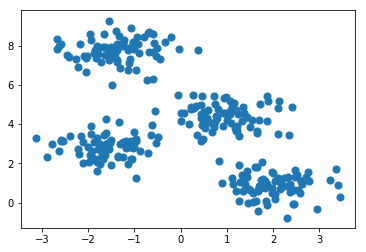

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples=300, centers=4, 
                      cluster_std = 0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [-1.37324398,  7.75368871],
       [ 1.98258281,  0.86771314],
       [ 0.94973532,  4.41906906]])

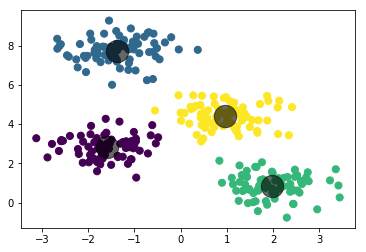

In [15]:
plt.scatter(X[:,0],X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black',s = 500, alpha = 0.6);

## KMeans on Digits

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [17]:
kmeans = KMeans(n_clusters=10, random_state=0)

In [18]:
clusters = kmeans.fit_predict(digits.data)
# predicting which cluster the data belongs to

In [19]:
clusters.shape

(1797,)

In [20]:
clusters

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [21]:
clusters
kmeans.cluster_centers_[0].reshape(8,8)

array([[  0.00000000e+00,  -9.99200722e-16,   3.07228916e-01,
          7.16265060e+00,   1.19457831e+01,   1.93373494e+00,
          1.50602410e-01,   5.42168675e-02],
       [ -2.25514052e-17,   1.20481928e-02,   3.28313253e+00,
          1.37951807e+01,   8.46385542e+00,   1.53012048e+00,
          9.75903614e-01,   2.77108434e-01],
       [ -1.12757026e-17,   6.44578313e-01,   1.07108434e+01,
          1.15602410e+01,   4.33734940e+00,   5.25903614e+00,
          3.87349398e+00,   3.25301205e-01],
       [  6.02409639e-03,   4.75903614e+00,   1.47590361e+01,
          5.86144578e+00,   6.87951807e+00,   1.07530120e+01,
          6.21686747e+00,   1.80722892e-02],
       [  0.00000000e+00,   8.92771084e+00,   1.48072289e+01,
          9.35542169e+00,   1.28132530e+01,   1.43915663e+01,
          5.48192771e+00,   0.00000000e+00],
       [  9.63855422e-02,   6.50602410e+00,   1.16867470e+01,
          1.23433735e+01,   1.48373494e+01,   1.07590361e+01,
          1.56626506e+00,  -4.1

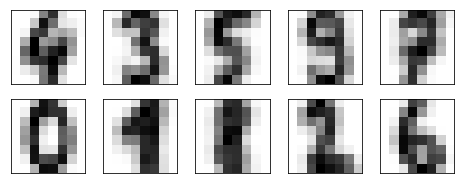

In [22]:
ig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

^ Above

The data is ordered by cluster number


label is the right information

In [23]:
from scipy.stats import mode

In [24]:
import numpy as np

In [25]:
labels = np.zeros_like(clusters)
# create a zero array lemgth data of cluster size

In [26]:
clusters.view()

array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

In [27]:

labels.shape

(1797,)

In [35]:
labels
mask = (clusters == 0)
mask

array([False, False, False, ..., False, False, False], dtype=bool)

In [36]:
digits.target[mask][0]

4

In [38]:
labels[mask]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int32)

In [39]:
for i in range(10):
    mask = (clusters == i)
    # First time : All the zeros are marked True
    # Second time : All the ones are marked True
    labels[mask]= mode(digits.target[mask])[0]

In [40]:
labels

array([0, 8, 8, ..., 8, 9, 9], dtype=int32)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79354479688369506

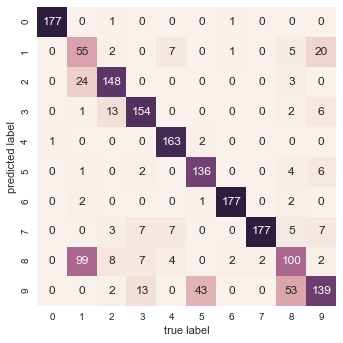

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');